#### DESCRIPTION

- The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

**Data Dictionary**
- UserID – 4848 customers who provided a rating for each movie
- Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

**Data Considerations**
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

**Analysis Task**
1. Exploratory Data Analysis:

   1. Which movies have maximum views/ratings?
   2. What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
   3. Define the top 5 movies with the least audience.
2. Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

   1. Divide the data into training and test data
   2. Build a recommendation model on training data
   3. Make predictions on the test data

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import surprise

In [2]:
df_review = pd.read_csv("Amazon.csv")
df_review.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_review.shape

(4848, 207)

## Analysis Task

## Task 1: Exploratory Data Analysis:

### Task 1(A): Which movie have maximum views/ratings?

In [4]:
description = df_review.describe().T
description

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


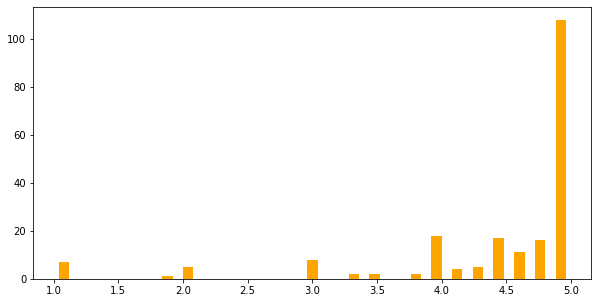

In [5]:
#description['mean'].plot(bins=25, kind='hist', color = 'indianred')
plt.figure(figsize=(10,5))
plt.hist(description['mean'], bins=25, color = 'orange', rwidth=.5)
plt.show()

In [6]:
description2 = description['count'].sort_values(ascending=False).to_frame()
description2.head(10)

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0
Movie91,128.0
Movie92,101.0
Movie89,83.0
Movie158,66.0
Movie108,54.0


**Observation: <i>The above table shows the top 10 Movies with their count(How many users view/rate a movie) soted in descending order</i>**

### Task 1(B): What is the average rating for each movie? Define the top 5 movies with the maximum ratings

In [7]:
rate_df = df_review.drop("user_id", axis = 1)
averag_rate = rate_df.mean().sort_values(ascending=False).to_frame().rename(columns={0 : "Avereage Rating"})
averag_rate.head(5)

,Avereage Rating
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


**Observation 1:<i> The above table shows the top 5 movies with maximum average ratings.</i>**

**Observation 2: <i>There is a posibility that those movies are just only rated once by single user to verify this we have to count the number of reviews provided.</i>**

In [8]:
averag_rate['count'] = description2['count']
averag_rate

,Avereage Rating,count
Movie1,5.0,1.0
Movie66,5.0,1.0
Movie76,5.0,2.0
Movie75,5.0,1.0
Movie74,5.0,1.0
...,...,...
Movie58,1.0,1.0
Movie60,1.0,1.0
Movie154,1.0,1.0
Movie45,1.0,1.0


**Observation: <i>The above table shows top 10 movies with maximum average ratings, it is clearly seen that most of these movies are rated by one user only</i>**

<b><i> Note: It coulb be possible that there are many movies rating which is only provided by one user.</i></b>

In [9]:
averag_rate[averag_rate["count"] == 1]

,Avereage Rating,count
Movie1,5.0,1.0
Movie66,5.0,1.0
Movie75,5.0,1.0
Movie74,5.0,1.0
Movie143,5.0,1.0
...,...,...
Movie58,1.0,1.0
Movie60,1.0,1.0
Movie154,1.0,1.0
Movie45,1.0,1.0


**Observation:<i> The above table shows that there are total of 89 movies which are reviewed by only one user.</i>**

### Task 1(C): Define the top 5 movies with the least audience

In [10]:
least_aud = averag_rate["count"].sort_values().to_frame()
least_aud.head(5)

,count
Movie1,1.0
Movie34,1.0
Movie35,1.0
Movie36,1.0
Movie37,1.0


**Observation: <i>Above table shows top 5 movies with least audience</i>**

## Task 2: Recomendation Model

In [11]:
#importing required libraries for Recomendation model
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import SVD

In [12]:
df_melt = df_review.melt(id_vars=df_review.columns[0], value_vars=df_review.columns[1:],value_name="Ratings", var_name="MovieName")
df_melt

,user_id,MovieName,Ratings
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [13]:
rd = Reader(rating_scale=(-1,10))
new_df = Dataset.load_from_df(df_melt.fillna(0),reader=rd)
new_df

### Task 2(A): Divide the data into training and test data

In [14]:
train_df, test_df = train_test_split(new_df, test_size=.3, random_state=2)

In [15]:
# let's look at the shape of test and training data:
#print("Shape of Test data:", test_df.shape)
#print("Shape of Train data:", train_df.shape)

### Task 2(B): Build a recommendation model on training data 

In [16]:
algo = SVD()

In [17]:
algo.fit(train_df)

In [18]:
pred = algo.test(test_df)

In [19]:
print("RSME:",accuracy.rmse(pred, verbose=False))
print("MAE:",accuracy.mae(pred, verbose=False))

RSME: 0.28105981930308027
MAE: 0.04189407823123106


In [20]:
user_id = "A3R5OBKS7OM2IR"
muvi_id = "Movie1"
r_ui = 5.0
algo.predict(user_id, muvi_id, r_ui=r_ui, verbose=True)

user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.09   {'was_impossible': False}


Prediction(uid='A3R5OBKS7OM2IR', iid='Movie1', r_ui=5.0, est=0.0924172866112498, details={'was_impossible': False})

In [21]:
from surprise.model_selection import cross_validate

In [22]:
cross_validate(algo, new_df, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2796  0.2829  0.2838  0.2821  0.0018  
MAE (testset)     0.0433  0.0427  0.0426  0.0429  0.0003  
Fit time          46.16   51.35   47.75   48.42   2.17    
Test time         3.57    3.25    2.98    3.27    0.24    


{'test_rmse': array([0.27963505, 0.28287026, 0.28375187]),
 'test_mae': array([0.04334702, 0.04269124, 0.04264858]),
 'fit_time': (46.161086082458496, 51.34642505645752, 47.74627733230591),
 'test_time': (3.5713953971862793, 3.25388765335083, 2.9777610301971436)}

In [23]:
def repeat(algotype, frame, min_, max_):
    rd = Reader(rating_scale=(min_,max_))
    
    data = Dataset.load_from_df(df_melt.fillna(0), reader=rd)
    algo = algotype
    print(cross_validate(algo, new_df, measures=["RMSE", "MAE"], cv=3, verbose=True))
    print("#"*50)
    user_id = "A3R5OBKS7OM2IR"
    muvi_id = "Movie1"
    r_ui = 5.0
    print(algo.predict(user_id, muvi_id, r_ui=r_ui, verbose=True))
    print("#"*50)
    print()

In [24]:
df_review= df_review.iloc[:3000, :50]
movie_df = df_review.melt(id_vars = df_review.columns[0],value_vars=df_review.columns[1:],var_name="Movies",value_name="Rating")

In [25]:
repeat(SVD(),movie_df.fillna(0),-1,10)
repeat(SVD(),movie_df.fillna(movie_df.mean()),-1,10)
repeat(SVD(),movie_df.fillna(movie_df.median()),-1,10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2794  0.2802  0.2854  0.2817  0.0026  
MAE (testset)     0.0426  0.0430  0.0435  0.0430  0.0004  
Fit time          46.83   46.56   47.25   46.88   0.29    
Test time         4.24    3.18    3.88    3.77    0.44    
{'test_rmse': array([0.27942364, 0.28024617, 0.28536657]), 'test_mae': array([0.0425603 , 0.04303888, 0.04353989]), 'fit_time': (46.83037328720093, 46.559178829193115, 47.25348162651062), 'test_time': (4.2433693408966064, 3.1840529441833496, 3.8778607845306396)}
##################################################
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.09   {'was_impossible': False}
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.09   {'was_impossible': False}
##################################################



C:\Users\shubh\AppData\Local\Temp\ipykernel_24548\4208688492.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_df.fillna(movie_df.mean()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2790  0.2825  0.2846  0.2821  0.0023  
MAE (testset)     0.0427  0.0427  0.0430  0.0428  0.0002  
Fit time          45.79   47.81   46.16   46.59   0.88    
Test time         3.35    2.90    3.63    3.29    0.30    
{'test_rmse': array([0.27901006, 0.28252742, 0.2846473 ]), 'test_mae': array([0.0426812 , 0.04271885, 0.04303941]), 'fit_time': (45.79037404060364, 47.80583071708679, 46.161972761154175), 'test_time': (3.3495352268218994, 2.8955140113830566, 3.629845380783081)}
##################################################
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.08   {'was_impossible': False}
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.08   {'was_impossible': False}
##################################################



C:\Users\shubh\AppData\Local\Temp\ipykernel_24548\4208688492.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_df.fillna(movie_df.median()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2817  0.2845  0.2791  0.2818  0.0022  
MAE (testset)     0.0429  0.0422  0.0424  0.0425  0.0003  
Fit time          49.97   46.80   46.78   47.85   1.50    
Test time         3.58    3.43    3.01    3.34    0.24    
{'test_rmse': array([0.28167693, 0.28450219, 0.27909982]), 'test_mae': array([0.04286297, 0.042221  , 0.04239836]), 'fit_time': (49.973782777786255, 46.80104660987854, 46.77893328666687), 'test_time': (3.576206922531128, 3.4251534938812256, 3.01025652885437)}
##################################################
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.09   {'was_impossible': False}
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.09   {'was_impossible': False}
##################################################



In [26]:
#trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV

In [27]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [28]:
gsearch = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gsearch.fit(new_df)

In [30]:
gsearch.best_score

{'rmse': 0.2795678071656222, 'mae': 0.041175794141714864}

In [31]:
print(gsearch.best_score["rmse"])
print(gsearch.best_params["rmse"])
print(gsearch.best_score["mae"])
print(gsearch.best_params["mae"])

0.2795678071656222
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
0.041175794141714864
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
